In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl

In [2]:
data = pd.read_csv("spam.csv",encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.shape

(5572, 5)

In [4]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
data.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

#rename the label and text columns
data = data.rename(columns={"v1":"target", "v2":"text"})
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.shape

(5572, 2)

In [7]:
data.duplicated().sum()

403

In [8]:
print("before removing duplicates;",data.shape)

before removing duplicates; (5572, 2)


In [9]:
data.drop_duplicates(keep='first',inplace=True)
print("after removing duplicates",data.shape)

after removing duplicates (5169, 2)


In [10]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
data["target"].value_counts()

ham     4516
spam     653
Name: target, dtype: int64

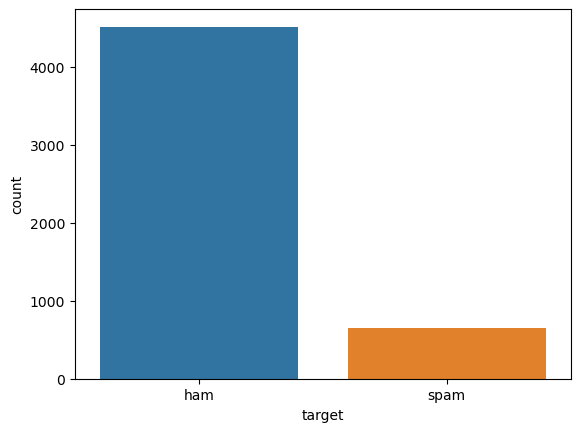

In [12]:
sns.countplot(data['target'])
plt.show()

In [13]:
#data['label'] = data['target'].map( {'spam': 1, 'ham': 0} )

In [14]:
# Séparation des caractéristiques et des étiquettes de classe
y = data['target']
X = data.drop('target', axis=1)

In [15]:
X

,text
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [16]:
from imblearn.under_sampling import RandomUnderSampler

# Assuming X and y are your feature and target variables
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)


In [17]:
y_resampled.value_counts()

ham     653
spam    653
Name: target, dtype: int64

In [18]:
X_resampled

,text
1883,"Come to me, slave. Your doing it again ... Goi..."
1709,U meet other fren dun wan meet me ah... Muz b ...
4919,"G says you never answer your texts, confirm/deny"
1297,"K so am I, how much for an 8th? Fifty?"
3948,HMM yeah if your not too grooved out! And im l...
...,...
5537,Want explicit SEX in 30 secs? Ring 02073162414...
5540,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,Had your contract mobile 11 Mnths? Latest Moto...
5566,REMINDER FROM O2: To get 2.50 pounds free call...


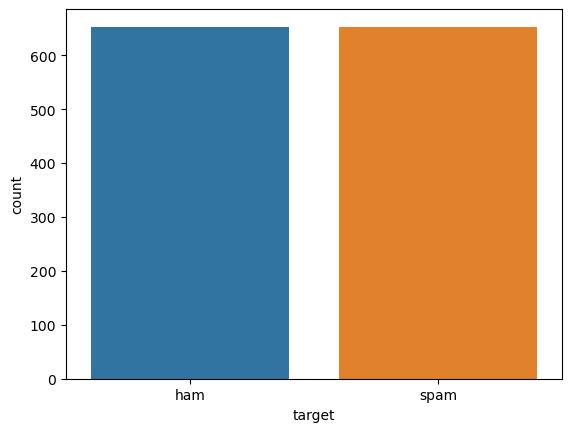

In [19]:
sns.countplot(y_resampled)
plt.show()

In [20]:
X_resampled.duplicated().sum()

0

In [21]:
X_resampled

,text
1883,"Come to me, slave. Your doing it again ... Goi..."
1709,U meet other fren dun wan meet me ah... Muz b ...
4919,"G says you never answer your texts, confirm/deny"
1297,"K so am I, how much for an 8th? Fifty?"
3948,HMM yeah if your not too grooved out! And im l...
...,...
5537,Want explicit SEX in 30 secs? Ring 02073162414...
5540,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,Had your contract mobile 11 Mnths? Latest Moto...
5566,REMINDER FROM O2: To get 2.50 pounds free call...


In [22]:
y_resampled_array = y_resampled.values.reshape(-1, 1)

# Combine X_resampled and y_resampled_array horizontally (along columns)
combined_data = np.concatenate((X_resampled, y_resampled_array), axis=1)

In [23]:
#combined_data

In [24]:
data = pd.DataFrame(combined_data, columns=list(X_resampled.columns)+ ['target'])


In [25]:
data['num_characters'] = data['text'].apply(len)
data.head()

,text,target,num_characters
0,"Come to me, slave. Your doing it again ... Goi...",ham,128
1,U meet other fren dun wan meet me ah... Muz b ...,ham,59
2,"G says you never answer your texts, confirm/deny",ham,48
3,"K so am I, how much for an 8th? Fifty?",ham,38
4,HMM yeah if your not too grooved out! And im l...,ham,83


In [26]:
data.shape

(1306, 3)

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

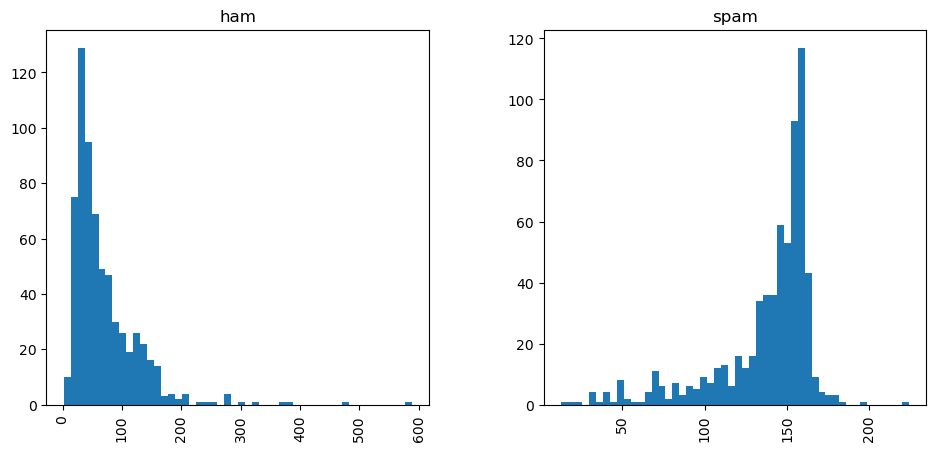

In [27]:
data.hist(column='num_characters', by='target', bins=50,figsize=(11,5))

In [28]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iknem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
# num of words
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))
#num of sentences
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
data

,text,target,num_characters,num_words,num_sentences
0,"Come to me, slave. Your doing it again ... Goi...",ham,128,28,3
1,U meet other fren dun wan meet me ah... Muz b ...,ham,59,16,1
2,"G says you never answer your texts, confirm/deny",ham,48,9,1
3,"K so am I, how much for an 8th? Fifty?",ham,38,13,2
4,HMM yeah if your not too grooved out! And im l...,ham,83,19,2
...,...,...,...,...,...
1301,Want explicit SEX in 30 secs? Ring 02073162414...,spam,90,18,3
1302,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,spam,160,38,6
1303,Had your contract mobile 11 Mnths? Latest Moto...,spam,160,35,5
1304,REMINDER FROM O2: To get 2.50 pounds free call...,spam,147,30,1


In [31]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['target']=encoder.fit_transform(data['target'])

In [32]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1306.000000,1306.000000,1306.000000
mean,103.880551,22.358346,2.383614
std,57.113582,12.097506,1.523962
min,2.000000,1.000000,1.000000
25%,48.250000,12.000000,1.000000
50%,115.000000,24.000000,2.000000
75%,152.000000,30.000000,3.000000
max,588.000000,154.000000,16.000000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            1306 non-null   object
 1   target          1306 non-null   int32 
 2   num_characters  1306 non-null   int64 
 3   num_words       1306 non-null   int64 
 4   num_sentences   1306 non-null   int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 46.0+ KB


In [34]:
data.groupby('target').describe().T

target                         0           1
num_characters count  653.000000  653.000000
               mean    69.869832  137.891271
               std     57.477255   30.137753
               min      2.000000   13.000000
               25%     32.000000  132.000000
               50%     51.000000  149.000000
               75%     89.000000  157.000000
               max    588.000000  224.000000
num_words      count  653.000000  653.000000
               mean    17.049005   27.667688
               std     13.687262    7.008418
               min      1.000000    2.000000
               25%      8.000000   25.000000
               50%     13.000000   29.000000
               75%     22.000000   32.000000
               max    154.000000   46.000000
num_sentences  count  653.000000  653.000000
               mean     1.799387    2.967841
               std      1.328498    1.483201
               min      1.000000    1.000000
               25%      1.000000    2.000000
               50%      1.000000    3.000000
               75%      2.000000    4.000000
               max     16.000000    8.000000

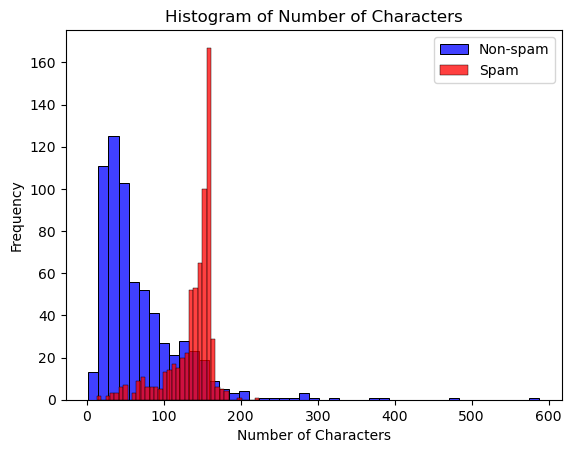

In [35]:
#num_characters
import seaborn as sns
sns.histplot(data[data['target'] == 0]['num_characters'], color='blue', label='Non-spam')
sns.histplot(data[data['target'] == 1]['num_characters'], color='red', label='Spam')

plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Characters')

plt.legend()

plt.show()

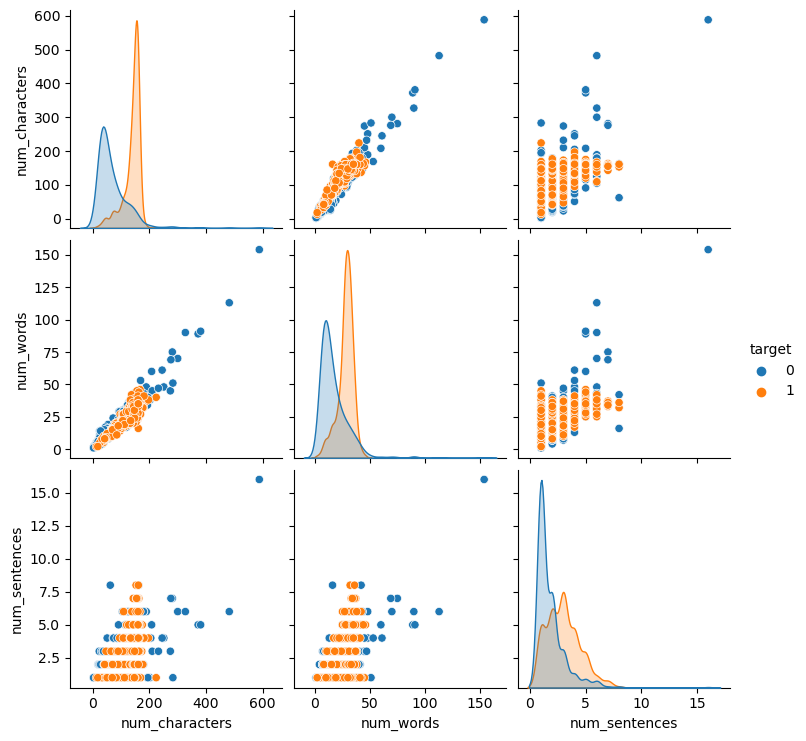

In [36]:
sns.pairplot(data,hue='target')

<AxesSubplot:>

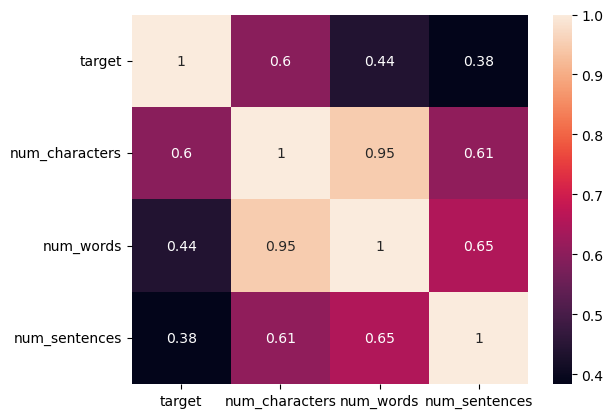

In [37]:
sns.heatmap(data.corr(),annot=True)

In [38]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
import string


In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iknem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [41]:
# Function to transform the text
def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text into individual words
    text = nltk.word_tokenize(text)
    
    # Create an empty list to store filtered words
    filtered_words = []
    
    # Iterate over each word in the text
    for word in text:
        # Check if the word contains only alphanumeric characters
        if word.isalnum():
            # Add the word to the filtered list
            filtered_words.append(word)
    
    # Update the text with the filtered words
    text = filtered_words[:]
    
    # Clear the filtered words list for reuse
    filtered_words.clear()
    
    # Remove stop words and punctuation from the text
    for word in text:
        # Check if the word is not a stop word or punctuation mark
        if word not in stopwords.words('english') and word not in string.punctuation:
            # Add the word to the filtered list
            filtered_words.append(word)
            
    # Update the text with the filtered words
    text = filtered_words[:]
    
    # Clear the filtered words list for reuse
    filtered_words.clear()
    
    # Apply stemming to the words in the text
    stemmer = PorterStemmer()
    for word in text:
        # Perform stemming on each word
        stemmed_word = stemmer.stem(word)
        # Add the stemmed word to the filtered list
        filtered_words.append(stemmed_word)
    
    # Join the filtered words to form the transformed text
    transformed_text = " ".join(filtered_words)
    
    # Return the transformed text
    return transformed_text

In [42]:
s = data["text"][100]

In [43]:
s

'I know you mood off today'

In [44]:
transform_text(s)

'know mood today'

In [45]:
data['transformed_text'] = data['text'].apply(transform_text)

In [46]:
data.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,"Come to me, slave. Your doing it again ... Goi...",0,128,28,3,come slave go shell unconsci avoid make unhappi
1,U meet other fren dun wan meet me ah... Muz b ...,0,59,16,1,u meet fren dun wan meet ah muz b guy rite
2,"G says you never answer your texts, confirm/deny",0,48,9,1,g say never answer text
3,"K so am I, how much for an 8th? Fifty?",0,38,13,2,k much 8th fifti
4,HMM yeah if your not too grooved out! And im l...,0,83,19,2,hmm yeah groov im look forward pound special


In [47]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

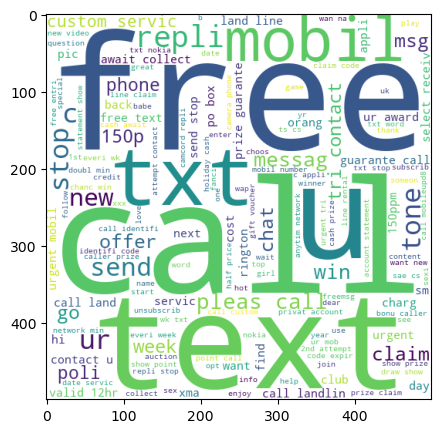

In [48]:
#generating Word cloud for only Spam words
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,5))
plt.imshow(spam_wc)
plt.show()

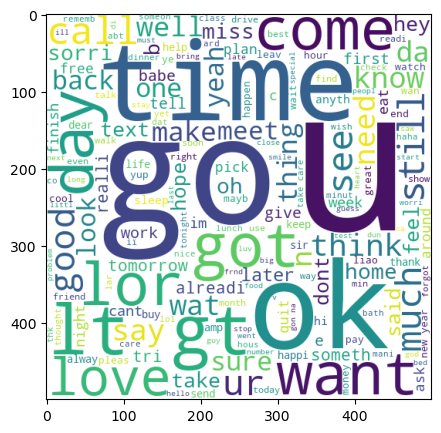

In [49]:
#generating Word cloud for only ham words

ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,5))
plt.imshow(ham_wc)
plt.show()

In [50]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
len(spam_corpus)

9939

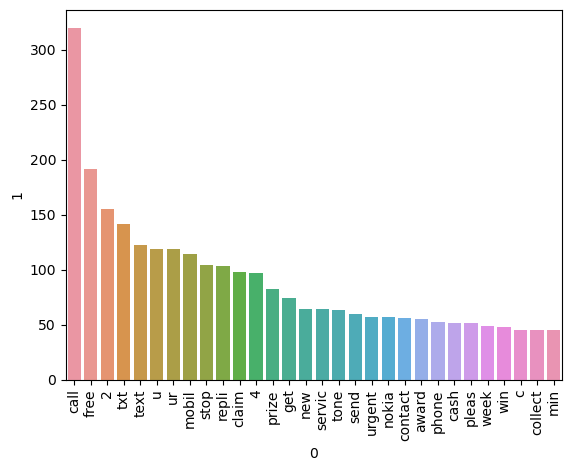

In [52]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
ham_corpus = []
for msg in data[data['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [54]:
len(ham_corpus)

5094

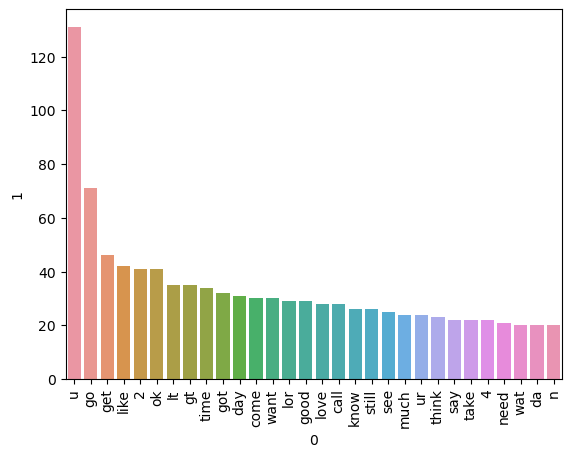

In [55]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [57]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [58]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
y = data['target'].values

In [60]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,matthews_corrcoef,classification_report,f1_score

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [65]:
svc = SVC(kernel='sigmoid')
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [66]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [67]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    mcc = matthews_corrcoef(y_test,y_pred)
    #f1_sc = f1_score(y_test,y_pred)
    
    return accuracy,precision,mcc

In [68]:
accuracy_scores = []
precision_scores = []
mcc_scores = []
f1_scores  = []
for name,clf in clfs.items():
    
    current_accuracy,current_precision,mcc = train_classifier(clf, X_train,y_train,X_test,y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    mcc_scores.append(mcc)
    #f1_scores.append(f1_sc)

In [69]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'MCC':mcc_scores}).sort_values('Precision',ascending=False)

In [70]:
performance_df

,Algorithm,Accuracy,Precision,MCC
1,KN,0.625954,1.000000,0.371968
0,SVC,0.946565,0.991453,0.896738
8,ETC,0.946565,0.983193,0.895601
5,RF,0.938931,0.974790,0.880267
2,NB,0.938931,0.937984,0.877834
10,xgb,0.904580,0.926230,0.810120
6,AdaBoost,0.896947,0.925000,0.795513
4,LR,0.874046,0.906780,0.750367
7,BgC,0.900763,0.905512,0.801528
9,GBDT,0.877863,0.900826,0.756856


In [71]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

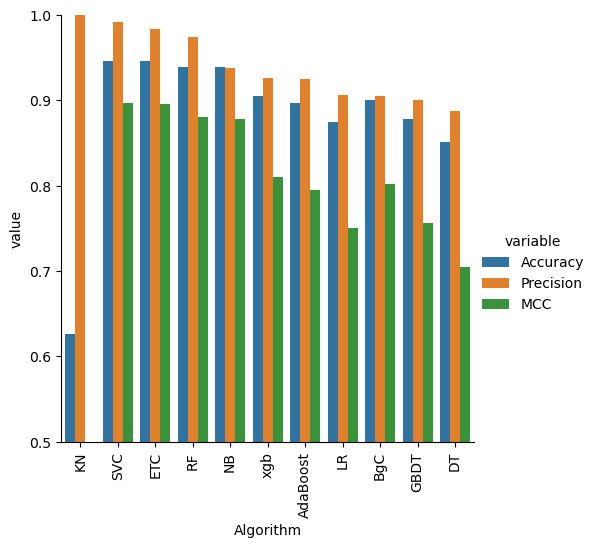

In [72]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [73]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
rf = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [74]:
voting = VotingClassifier(estimators=[('svm', svc), ('rf', rfc), ('et', etc)],voting='soft')

In [75]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [76]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("MCC",matthews_corrcoef(y_test,y_pred))
print("F1 ",f1_score(y_test,y_pred))

Accuracy 0.950381679389313
Precision 0.9915254237288136
MCC 0.9038144683974424
F1  0.9473684210526316


In [77]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))